In [2]:
from google.colab import files
testdata = files.upload()
traindata = files.upload()

Saving test.csv to test.csv


Saving train.csv to train.csv


In [3]:
import pandas as pd
import numpy as np
import re
import string

In [4]:

df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')
stopwords = files.upload()
# stopwords = pd.read_csv('stop_words.txt')
data = stopwords['stop_words.txt'].decode("utf-8").split("\r\n")
data_1 = pd.read_csv('stop_words.txt', sep=' ', header=None)
stoppers = data_1.loc[:,0].values
stops = []
for i in range(len(data)):
  data[i] = data[i].split(",")
  stops.append(data)



Saving stop_words.txt to stop_words.txt


#**Data Pre-processing** 

In [5]:
df_train = df_train.apply(lambda x: x.astype(str).str.lower()) #lambda functions to convert whole dataframe into lowercase
df_test = df_test.apply(lambda x: x.astype(str).str.lower()) #lambda functions to convert whole dataframe into lowercase

# **Training Data Processing**


In [6]:

for i,tweet in enumerate(df_train['Tweet']):
  punc = string.punctuation # punctuation string
  words = tweet.split() # tokenizing the tweet  
  # words = [token for token in words if not token in list(stops)]
  filtered_word_list = words #make a copy of the word_list
  for word in words: # iterate over word_list
    if word in stops: 
      filtered_word_list.remove(word)
  mytweet = filtered_word_list
  mytweet = (" ").join(words) # re-joining the string
  mytweet = re.sub(r"http\S+", "", mytweet) # removing URLs
  mytweet = mytweet.translate(str.maketrans('', '', string.punctuation)) #removing punctuations
  df_train['Tweet'][i] = mytweet
df_train['Tweet'] = df_train['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoppers)]))

In [7]:
from string import digits
for i,tweet in enumerate(df_train['Tweet']): 
  remove_digits = str.maketrans('','', digits) # removing numeric characters
  df_train['Tweet'][i] = tweet.translate(remove_digits)

# **Test Data Processing**

In [8]:
for i,tweet in enumerate(df_test['Tweet']):
  punc = string.punctuation # punctuation string
  words = tweet.split() # tokenizing the tweet  
  filtered_word_list = words #make a copy of the word_list
  for word in words: # iterate over word_list
    if word in stops: 
      filtered_word_list.remove(word)
  mytweet = filtered_word_list
  mytweet = (" ").join(words) # re-joining the string
  mytweet = re.sub(r"http\S+", "", mytweet) # removing URLs
  mytweet = mytweet.translate(str.maketrans('', '', string.punctuation)) #removing punctuations
  df_test['Tweet'][i] = mytweet
df_test['Tweet'] = df_test['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoppers)]))

In [9]:
from string import digits
for i,tweet in enumerate(df_test['Tweet']): 
  remove_digits = str.maketrans('','', digits) # removing numeric characters
  df_test['Tweet'][i] = tweet.translate(remove_digits)

# **Part 1**

In [10]:
dictionary_train = {} # dictionary of unique words for train
i = 0
for tweet in df_train['Tweet']:
  tokens = tweet.split()
  for token in tokens:
    if not token in dictionary_train:
     dictionary_train[token] = i
     i += 1


vector_train = [] # vectors of each bag of words of a tweet for train 
for tweet in df_train['Tweet']:
  tokens = tweet.split()
  boW_train = [0]*len(dictionary_train)
  for token in tokens:
    if token in dictionary_train:
      boW_train[dictionary_train[token]] += 1
  vector_train.append(boW_train)


In [11]:

vector_test = [] # vectors of each bag of words of a tweet for test 
for tweet in df_test['Tweet']:
  tokens = tweet.split()
  boW_test = [0]*len(dictionary_train)
  for token in tokens:
    if token in dictionary_train:
      boW_test[dictionary_train[token]] += 1
  vector_test.append(boW_test)

In [13]:
import scipy
from scipy import spatial
Y = scipy.spatial.distance.cdist(vector_train, vector_test, 'euclidean') # euclidean distance for train and test

In [14]:
print(Y.T.shape[0])
Y_transpose = Y.T # tranposing to extract K minimum easily

2921


In [29]:
import matplotlib.pyplot as plt
arr = [1,3,5,7,10] # K VALUES

accuracies = [] # ARRAY FOR ACCURACIES
values_of_k = [] # ARRAY FOR K VALUES
precision_array = [] # ARRAY FOR PRECISIONS FOR K VALUES
recall_array = [] # ARRAY FOR PRECISIONS FOR K VALUES
f1_score_array = [] # ARRAY FOR F1_SCORE FOR K VALUES

for k in arr: # FOR LOOP FOR DIFFERENT K VALUES
  smallest_indexes = []
  smallest_values = []
  precision = 0
  recall = 0
  f1_score = 0
  classification_matrix = np.zeros((3,3)) # CLASSIFICATION MATRIX INITIALISED BY ZEROS
  precision_negative = 0
  precision_positive = 0
  precision_neutral = 0
  recall_negative = 0
  recall_positive = 0
  recall_neutral = 0
  for i in range(Y.T.shape[0]):
    Y_transpose[i] = np.array(Y_transpose[i])
    index = np.argpartition(Y_transpose[i], k)
    smallest_indexes.append(np.array(index[:k])) # K MINIMUM VALUES' INDEX EXTRACTED OF EACH TWEET AND APPENDED
    smallest_values.append(np.array(Y_transpose[i][index[:k]]))


  def most_frequent(List): # FUNCTION TO GIVE MOST FREQUENT SENTIMENT
    counter = 0
    num = List[0] 
        
    for i in List: 

        curr_frequency = List.count(i) 
        if curr_frequency == counter:
          List.remove(List[-1])
          most_frequent(List)
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i
    
    return num 
    

  acc = 0
  sentiments = [0]*3
  y_pred = []
  for i in range(len(smallest_indexes)): # FINDING A MATCH, GOING THROUGH EACH TWEET
  
    for j in range(k):
      list = []
      list.append(df_train['Sentiment'][(smallest_indexes[i][j])])
      max_string = most_frequent(list)
  
    if max_string == df_test['Sentiment'][i]:
      acc += 1
      if max_string == 'negative':
        classification_matrix[0][0] += 1 
      if max_string == 'positive':
        classification_matrix[1][1] += 1 
      if max_string == 'neutral':
        classification_matrix[2][2] += 1 
    if max_string == 'negative' and df_test['Sentiment'][i] == 'positive':
      classification_matrix[0][1] += 1
    if max_string == 'negative' and df_test['Sentiment'][i] == 'neutral':
      classification_matrix[0][2] += 1
    if max_string == 'positive' and df_test['Sentiment'][i] == 'negative':
      classification_matrix[1][0] += 1
    if max_string == 'positive' and df_test['Sentiment'][i] == 'neutral':
      classification_matrix[1][2] += 1
    if max_string == 'neutral' and df_test['Sentiment'][i] == 'positive':
      classification_matrix[2][1] += 1
    if max_string == 'neutral' and df_test['Sentiment'][i] == 'negative':
      classification_matrix[2][0] += 1
    
  
  sum_row = np.sum(classification_matrix, axis=1)
  sum_column = np.sum(classification_matrix, axis=0)

  precision_negative = classification_matrix[0][0]/sum_row[0] # CALCULATING PRECISION FOR NEGATIVE

  recall_negative = classification_matrix[0][0]/sum_column[0] # CALCULATING RECALL FOR NEGATIVE

  precision_positive = classification_matrix[1][1]/sum_row[1] # CALCULATING PRECISION FOR POSITIVE

  recall_positive = classification_matrix[1][1]/sum_column[1] # CALCULATING RECALL FOR POSITIVE

  precision_neutral = classification_matrix[2][2]/sum_row[2] # CALCULATING PRECISION FOR NEUTRAL

  recall_neutral = classification_matrix[2][2]/sum_column[2] # CALCULATING RECALL FOR NEUTRAL

  precision = (precision_negative + precision_positive + precision_neutral)/3
  recall = (recall_negative + recall_positive + recall_neutral)/3 

  f1_score = 2*(precision*recall)/(precision+recall)

  print('----------------------- {} NN -----------------------'.format(k))
  print('\n')
  print('Accuracy', round((acc/2921*100),1), '%')
  print(classification_matrix)
  print('Precision',round((precision),2))
  print('Recall',round((recall),2))
  print('F1_Score',round((f1_score),2))
  print('\n')

  
  accuracies.append((acc/2921))
  print(acc/2921)
  values_of_k.append(k)
  precision_array.append(precision)
  recall_array.append(recall)
  f1_score_array.append(f1_score)



----------------------- 1 NN -----------------------


Accuracy 50.8 %
[[866.  57. 119.]
 [246. 267. 144.]
 [722. 148. 352.]]
Precision 0.51
Recall 0.54
F1_Score 0.52


0.5083875385142075
----------------------- 3 NN -----------------------


Accuracy 44.9 %
[[707.  55.  97.]
 [353. 262. 175.]
 [774. 155. 343.]]
Precision 0.47
Recall 0.5
F1_Score 0.49


0.4491612461485793
----------------------- 5 NN -----------------------


Accuracy 41.7 %
[[669.  63. 135.]
 [460. 265. 195.]
 [705. 144. 285.]]
Precision 0.44
Recall 0.46
F1_Score 0.45


0.41732283464566927
----------------------- 7 NN -----------------------


Accuracy 40.1 %
[[635.  60. 122.]
 [523. 260. 218.]
 [676. 152. 275.]]
Precision 0.43
Recall 0.45
F1_Score 0.44


0.40054775761725436
----------------------- 10 NN -----------------------


Accuracy 37.7 %
[[566.  67. 122.]
 [574. 260. 219.]
 [694. 145. 274.]]
Precision 0.41
Recall 0.43
F1_Score 0.42


0.3765833618623759


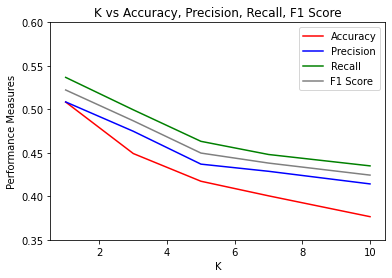

In [30]:

plt.plot(values_of_k, accuracies, 'r-',label='Accuracy') # plotting t, a separately 
plt.plot(values_of_k, precision_array, 'b-', label='Precision') # plotting t, b separately 
plt.plot(values_of_k, recall_array, 'g-', label='Recall') # plotting t, c separately 
plt.plot(values_of_k, f1_score_array, color = 'grey', label= 'F1 Score')
plt.legend()
plt.title('K vs Accuracy, Precision, Recall, F1 Score')
plt.xlabel('K')
plt.ylabel('Performance Measures')
plt.ylim((0.35,0.6))
plt.show()



# **Part 2**

In [46]:
arr = [1,3,5,7,10]
accs = []
for kk in arr:
  vector_train = np.array(vector_train)
  vector_test = np.array(vector_test)
  from sklearn.model_selection import train_test_split

  from sklearn.neighbors import KNeighborsClassifier

  text_classifier = KNeighborsClassifier(n_neighbors=kk)
  text_classifier.fit(vector_train, df_train['Sentiment'])
  predictions = text_classifier.predict(vector_test)
  from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
  print('----------------------- {} NN -----------------------'.format(kk))
  print('\n')
  print(confusion_matrix(df_test['Sentiment'],predictions))
  print(classification_report(df_test['Sentiment'],predictions))
  print('Accuracy for {}nn'.format(kk),accuracy_score(df_test['Sentiment'], predictions))
  accs.append(accuracy_score(df_test['Sentiment'], predictions))
  print('\n')

----------------------- 1 NN -----------------------


[[843 761 230]
 [111 392 112]
 [ 54 165 253]]
              precision    recall  f1-score   support

    negative       0.84      0.46      0.59      1834
     neutral       0.30      0.64      0.41       615
    positive       0.43      0.54      0.47       472

    accuracy                           0.51      2921
   macro avg       0.52      0.54      0.49      2921
weighted avg       0.66      0.51      0.53      2921

Accuracy for 1nn 0.5094145840465594


----------------------- 3 NN -----------------------


[[892 724 218]
 [111 375 129]
 [ 60 119 293]]
              precision    recall  f1-score   support

    negative       0.84      0.49      0.62      1834
     neutral       0.31      0.61      0.41       615
    positive       0.46      0.62      0.53       472

    accuracy                           0.53      2921
   macro avg       0.53      0.57      0.52      2921
weighted avg       0.67      0.53      0.56      2921

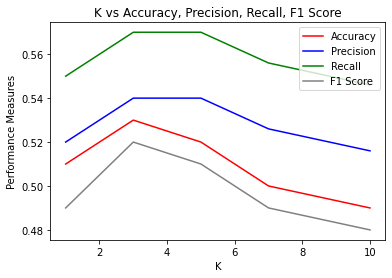

In [23]:
#plot graph for part2
import matplotlib.pyplot as plt
accuracies = accs # ARRAY FOR ACCURACIES
values_of_k = [1,3,5,7,10] # ARRAY FOR K VALUES
precision_array = [0.52,0.54,0.54,0.526,0.516] # ARRAY FOR PRECISIONS FOR K VALUES
recall_array = [0.55,0.57,0.57,0.556,0.546] # ARRAY FOR PRECISIONS FOR K VALUES
f1_score_array = [0.49,0.52,0.51,0.49,0.48] # ARRAY FOR F1_SCORE FOR K VALUES
plt.plot(values_of_k, accuracies, 'r-',label='Accuracy') # plotting t, a separately 
plt.plot(values_of_k, precision_array, 'b-', label='Precision') # plotting t, b separately 
plt.plot(values_of_k, recall_array, 'g-', label='Recall') # plotting t, c separately 
plt.plot(values_of_k, f1_score_array, color = 'grey', label= 'F1 Score')
plt.legend()
plt.title('K vs Accuracy, Precision, Recall, F1 Score')
plt.xlabel('K')
plt.ylabel('Performance Measures')
plt.show()

# **PART 3 FOR PART 1**

In [33]:
!wget 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
from gensim.models import KeyedVectors
import numpy as np

--2020-10-16 16:01:27--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.240.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.240.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  43.5MB/s    in 38s     

2020-10-16 16:02:06 (41.2 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [34]:
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [52]:
def extract_features(text):
  words = [word for word in text.split() if word in word2vec.vocab]
  return np.mean(word2vec[words], axis=0)

In [53]:
train_embeddings = []
for tweet in df_train['Tweet']:
  text_embedding = extract_features(tweet) # 300 DIMENSIONAL DENSE VECTOR 
  train_embeddings.append(text_embedding)

test_embeddings = []
for tweet in df_test['Tweet']:
  text_embedding = extract_features(tweet)
  test_embeddings.append(text_embedding)



In [39]:
train_embeddings = np.array(train_embeddings).T
test_embeddings = np.array(test_embeddings).T

In [40]:
Y_part3 = scipy.spatial.distance.cdist(train_embeddings, test_embeddings, 'euclidean')

In [41]:
print(Y_part3.shape)

(11680, 2921)


In [42]:
Y_part3_transpose = Y_part3.T

In [45]:
arr = [1,3,5,7,10]
accuracies = [] # ARRAY FOR ACCURACIES
values_of_k = [] # ARRAY FOR K VALUES
precision_array = [] # ARRAY FOR PRECISIONS FOR K VALUES
recall_array = [] # ARRAY FOR PRECISIONS FOR K VALUES
f1_score_array = [] # ARRAY FOR F1_SCORE FOR K VALUES

for k in arr:
  smallest_indexes_3 = []
  smallest_values_3 = []
  precision = 0
  recall = 0
  f1_score = 0
  classification_matrix = np.zeros((3,3)) # CLASSIFICATION MATRIX INITIALISED BY ZEROS
  precision_negative = 0
  precision_positive = 0
  precision_neutral = 0
  recall_negative = 0
  recall_positive = 0
  recall_neutral = 0
  for i in range(Y_part3.T.shape[0]):
    Y_part3_transpose[i] = np.array(Y_part3_transpose[i])
    index_3 = np.argpartition(Y_part3_transpose[i], k) # GETTING K MINIMUM INDEXES FOR SENTIMENTS
    smallest_indexes_3.append(np.array(index_3[:k]))
    smallest_values_3.append(np.array(Y_part3_transpose[i][index_3[:k]]))


  def most_frequent(List): 
    counter = 0
    num = List[0] 
        
    for i in List: 
        curr_frequency = List.count(i) 
        if curr_frequency == counter: # Handling ties in the sentiment list. 
          List.remove(List[-1])
          most_frequent(List)
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
    return num 
    

  acc_3 = 0
  sentiments = [0]*3
  y_pred = []
  for i in range(len(smallest_indexes_3)):
  
    for j in range(k):
      list = []
      list.append(df_train['Sentiment'][(smallest_indexes_3[i][j])])
      max_string = most_frequent(list) # MOST FREQUENT STRING

    if max_string == df_test['Sentiment'][i]:
      acc_3 += 1
      if max_string == 'negative':
        classification_matrix[0][0] += 1 
      if max_string == 'positive':
        classification_matrix[1][1] += 1 
      if max_string == 'neutral':
        classification_matrix[2][2] += 1 
    if max_string == 'negative' and df_test['Sentiment'][i] == 'positive': # MAKING OF CLASSIFICATION MATRIX
      classification_matrix[0][1] += 1
    if max_string == 'negative' and df_test['Sentiment'][i] == 'neutral':
      classification_matrix[0][2] += 1
    if max_string == 'positive' and df_test['Sentiment'][i] == 'negative':
      classification_matrix[1][0] += 1
    if max_string == 'positive' and df_test['Sentiment'][i] == 'neutral':
      classification_matrix[1][2] += 1
    if max_string == 'neutral' and df_test['Sentiment'][i] == 'positive':
      classification_matrix[2][1] += 1
    if max_string == 'neutral' and df_test['Sentiment'][i] == 'negative':
      classification_matrix[2][0] += 1
  sum_row = np.sum(classification_matrix, axis=1)
  sum_column = np.sum(classification_matrix, axis=0)

  precision_negative = classification_matrix[0][0]/sum_row[0] # CALCULATING PRECISION FOR NEGATIVE

  recall_negative = classification_matrix[0][0]/sum_column[0] # CALCULATING RECALL FOR NEGATIVE

  precision_positive = classification_matrix[1][1]/sum_row[1] # CALCULATING PRECISION FOR POSITIVE

  recall_positive = classification_matrix[1][1]/sum_column[1] # CALCULATING RECALL FOR POSITIVE

  precision_neutral = classification_matrix[2][2]/sum_row[2] # CALCULATING PRECISION FOR NEUTRAL

  recall_neutral = classification_matrix[2][2]/sum_column[2] # CALCULATING RECALL FOR NEUTRAL

  precision = (precision_negative + precision_positive + precision_neutral)/3
  recall = (recall_negative + recall_positive + recall_neutral)/3 

  f1_score = 2*(precision*recall)/(precision+recall)

  print('----------------------- {} NN -----------------------'.format(k))
  print('\n')
  print('Accuracy', round((acc_3/2921*100),1), '%')
  print(classification_matrix)
  print('Precision',round((precision),2))
  print('Recall',round((recall),2))
  print('F1_Score',round((f1_score),2))
  print('\n')

  
  accuracies.append((acc_3/2921))
  values_of_k.append(k)
  precision_array.append(precision)
  recall_array.append(recall)
  f1_score_array.append(f1_score)



----------------------- 1 NN -----------------------


Accuracy 70.9 %
[[1585.  152.  284.]
 [  99.  248.   93.]
 [ 150.   72.  238.]]
Precision 0.62
Recall 0.59
F1_Score 0.61


----------------------- 3 NN -----------------------


Accuracy 67.1 %
[[1563.  175.  352.]
 [ 116.  228.   95.]
 [ 155.   69.  168.]]
Precision 0.57
Recall 0.54
F1_Score 0.55


----------------------- 5 NN -----------------------


Accuracy 66.8 %
[[1573.  190.  353.]
 [ 115.  206.   91.]
 [ 146.   76.  171.]]
Precision 0.56
Recall 0.52
F1_Score 0.54


----------------------- 7 NN -----------------------


Accuracy 64.5 %
[[1521.  204.  375.]
 [ 141.  219.   97.]
 [ 172.   49.  143.]]
Precision 0.53
Recall 0.51
F1_Score 0.52


----------------------- 10 NN -----------------------


Accuracy 64.5 %
[[1537.  207.  376.]
 [ 141.  197.   89.]
 [ 156.   68.  150.]]
Precision 0.53
Recall 0.5
F1_Score 0.51




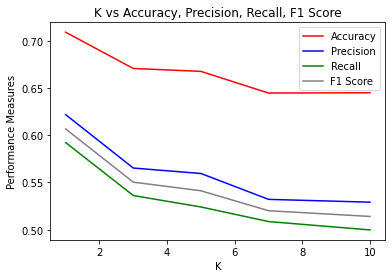

[0.7090037658336186, 0.670660732625813, 0.6675795960287573, 0.6446422458062308, 0.6449845943170147]


In [44]:
plt.plot(values_of_k, accuracies, 'r-',label='Accuracy') # plotting t, a separately 
plt.plot(values_of_k, precision_array, 'b-', label='Precision') # plotting t, b separately 
plt.plot(values_of_k, recall_array, 'g-', label='Recall') # plotting t, c separately 
plt.plot(values_of_k, f1_score_array, color = 'grey', label= 'F1 Score')
plt.legend()
plt.title('K vs Accuracy, Precision, Recall, F1 Score')
plt.xlabel('K')
plt.ylabel('Performance Measures')
plt.show()
print(accuracies)

# **PART 3 FOR PART 2**

In [48]:
arr = [1,3,5,7,10]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
for k in arr:

  text_classifier_part3 = KNeighborsClassifier(n_neighbors=k)
  text_classifier_part3.fit(train_embeddings, df_train['Sentiment'])
  predictions_part3 = text_classifier_part3.predict(test_embeddings)
  print('----------------------- {} NN -----------------------'.format(k))
  print('\n')
  print(confusion_matrix(df_test['Sentiment'],predictions_part3))
  print(classification_report(df_test['Sentiment'],predictions_part3))
  print('Accuracy for {}nn'.format(k),accuracy_score(df_test['Sentiment'], predictions_part3))
  print('\n')

----------------------- 1 NN -----------------------


[[1588  147   99]
 [ 283  232  100]
 [ 153   64  255]]
              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1834
     neutral       0.52      0.38      0.44       615
    positive       0.56      0.54      0.55       472

    accuracy                           0.71      2921
   macro avg       0.62      0.59      0.60      2921
weighted avg       0.69      0.71      0.70      2921

Accuracy for 1nn 0.7103731598767545


----------------------- 3 NN -----------------------


[[1727   72   35]
 [ 394  167   54]
 [ 191   48  233]]
              precision    recall  f1-score   support

    negative       0.75      0.94      0.83      1834
     neutral       0.58      0.27      0.37       615
    positive       0.72      0.49      0.59       472

    accuracy                           0.73      2921
   macro avg       0.68      0.57      0.60      2921
weighted avg       0.71      0.73  

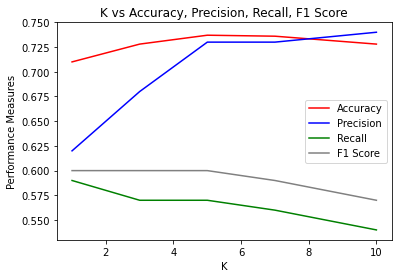

In [47]:
#plot graph for part3
import matplotlib.pyplot as plt
accuracies = [0.710,0.728,0.737,0.736,0.728] # ARRAY FOR ACCURACIES
values_of_k = [1,3,5,7,10] # ARRAY FOR K VALUES
precision_array = [0.62,0.68,0.73,0.73,0.74] # ARRAY FOR PRECISIONS FOR K VALUES
recall_array = [0.59,0.57,0.57,0.56,0.54] # ARRAY FOR PRECISIONS FOR K VALUES
f1_score_array = [0.60,0.60,0.60,0.59,0.57] # ARRAY FOR F1_SCORE FOR K VALUES
plt.plot(values_of_k, accuracies, 'r-',label='Accuracy') # plotting t, a separately 
plt.plot(values_of_k, precision_array, 'b-', label='Precision') # plotting t, b separately 
plt.plot(values_of_k, recall_array, 'g-', label='Recall') # plotting t, c separately 
plt.plot(values_of_k, f1_score_array, color = 'grey', label= 'F1 Score')
plt.legend()
plt.title('K vs Accuracy, Precision, Recall, F1 Score')
plt.xlabel('K')
plt.ylabel('Performance Measures')
plt.show()